
Variable	Definition	Key
- Survived	Survival	0 = No, 1 = Yes
- Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex	Sex
- Age	Age in years
- Sibsp	# of siblings / spouses aboard the Titanic
- Parch	# of parents / children aboard the Titanic
- Ticket	Ticket number
- Fare	Passenger fare
- Cabin	Cabin number
- Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown,S = Southampton


# Importing the Dataset

In [ ]:
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

In [ ]:
# Print the first few rows of the dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
titanic.shape

(891, 15)

- There are 891 rows and 15 columns within the dataset

In [ ]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic = titanic.drop(columns=['embark_town','deck','alive','class'], axis= 1)

- Dropped deck, more that 50% of the data was missing within the dataset.
- Dropped embark_town because it similar to embarked column
- Dropped the alive column because it similar to survived column
- Dropped clas column because it similar to pclass column

In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
5,0,3,male,NaN,0,0,8.4583,Q,man,True,True
6,0,1,male,54.0,0,0,51.8625,S,man,True,True
7,0,3,male,2.0,3,1,21.0750,S,child,False,False
8,1,3,female,27.0,0,2,11.1333,S,woman,False,False
9,1,2,female,14.0,1,0,30.0708,C,child,False,False


In [ ]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

<ipython-input-7-45c775f883ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


Age had missing values, as it important classification in survival or not, I imputed the missing vlaues by using median because it will reduce the risk of model bias caused by missing data. This leads to improved accuracy and reliability in your predictions regarding survival.

In [ ]:
# Fill NaN values in 'embarked' with the mode (most frequent value)
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Check if there are any missing values left in 'embarked'
print(titanic['embarked'].isnull().sum())


0


For embarked, there were only 3 identified within the dataset which were C = Cherbourg, Q = Queenstown,S = Southampton, therefore by using mode to fill the missing values is effective because it a categorical variable which less prone to biases looking at the overall dataset, also considering there were only 2 missing values within the dataset.

In [ ]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
who,0
adult_male,0


In [ ]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
who,object
adult_male,bool


In [ ]:
# Convert the 'who' column to categorical
titanic['who'] = titanic['who'].astype('category')


In [ ]:
titanic['embarked'] = titanic['embarked'].astype('category')

In [ ]:
titanic['sex'] = titanic['sex'].astype('category')

In [ ]:
# Convert 'pclass' column to categorical
titanic['pclass'] = titanic['pclass'].astype('category')

In [ ]:
titanic['survived'] = titanic['survived'].astype('category')

Changing who, embarked, sex, pclass, and survived to categorical variables because they are a form of identification/classification of individuals that were on the titanic.

In [ ]:
titanic.dtypes

,0
survived,category
pclass,category
sex,category
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,category
who,category
adult_male,bool


# Define X and Y

In [ ]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In order to run models, survived cannot be part of the features within the dataset, as we are predicted whether a person survived or not.

In [ ]:
feature_names = X.columns.tolist()
print(feature_names)

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male', 'alone']


These are the features within the dataset.

# Univariate Analysis

## Titanic 5-Number Summary

In [ ]:
titanic.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Age:**
- The average age on the titanic was 29.36 years old. The minimum age on the titanic 0.42 years old which is approximately 5 months old. The maximum age on the ship was 80 years old.

**Siblings/Parents:**
- On average, passengers had slightly more than half a sibling or spouse aboard, with many passengers traveling alone (as indicated by the median of 0).
- The maximum of 8 suggests that some families traveled together, which could have implications for survival, as families may have prioritized helping one another during the evacuation.

**Parch:**
- The average indicates that most passengers did not travel with parents or children, with the median at 0 suggesting that a significant number traveled without direct family.
- The maximum of 6 could indicate some families traveling with multiple children, which might have affected survival rates.

**Fare:**
- The mean fare of $32.20 indicates that there was a range of ticket prices, with many passengers paying much less than the average due to the skew from high-fare passengers (as shown by the high standard deviation).
- The maximum fare of 512.33 suggests that some passengers had access to luxurious accommodations, which may correlate with survival as wealthier passengers may have had better access to lifeboats.

- Age and Fare are likely significant factors for survival on the Titanic. Generally, younger and wealthier passengers had better survival odds.
SibSp and Parch suggest family dynamics that may have affected survival behavior during the crisis.


## Histograms

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

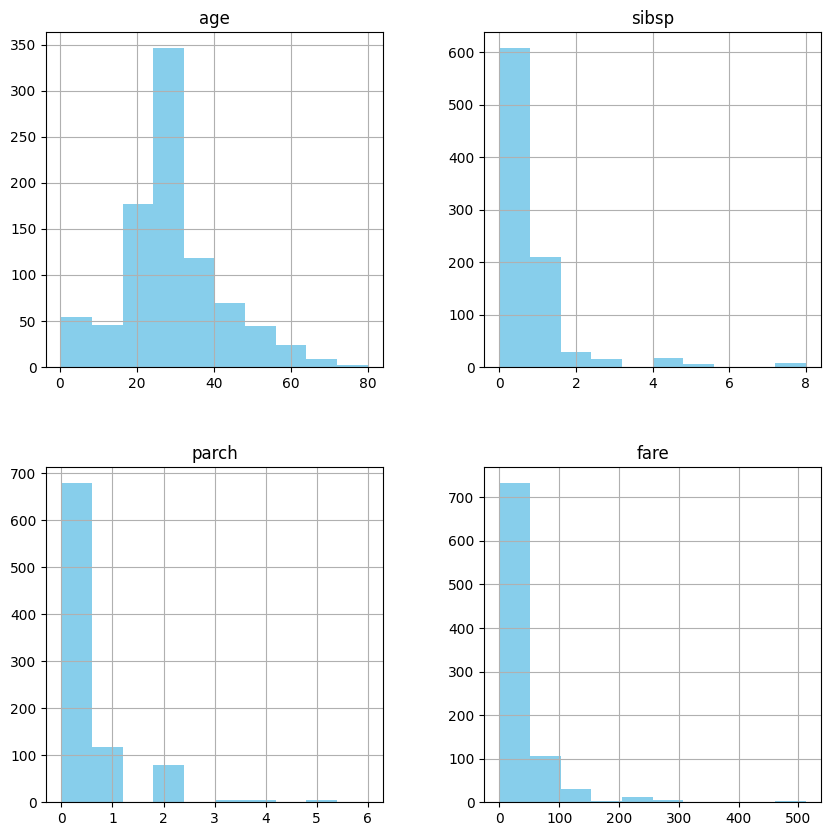

In [ ]:
titanic.hist(figsize=(10, 10), color = 'skyblue')


**Age:**
Observation: There are two prominent peaks, suggesting that there are many younger passengers (particularly children and teenagers) and a significant number of adults in their 30s to 40s. The distribution appears to be right-skewed, indicating that most passengers were younger, with fewer older individuals.

**Siblings/Spouses Aboard (sibsp):**
Distribution: This histogram displays the number of siblings or spouses that each passenger had aboard the Titanic.
Observation: Most passengers traveled with 0 to 2 siblings/spouses. The distribution has a sharp peak at 0, meaning a majority of passengers did not have any siblings or spouses on board, with very few passengers having more than 4 siblings/spouses.

**Parents/Children Aboard (parch):**
Distribution: The histogram shows the number of parents or children that each passenger had aboard the Titanic.
Observation: Similar to the sibsp histogram, most passengers traveled with 0 parents or children aboard. The peak at 0 suggests that most passengers were either traveling alone or did not have their parents or children with them. The distribution is also highly right-skewed, with very few passengers traveling with more than 2 parents or children.

**Fare:**
Distribution: This histogram represents the fare paid by each passenger for their ticket on the Titanic.
Observation: The distribution is highly right-skewed, with most passengers paying between $0 and $100. There are few passengers who paid higher fares, with some outliers on the higher end of the scale, suggesting that while most tickets were relatively affordable, a small number of passengers paid significantly more.

## Boxplots

<Axes: >

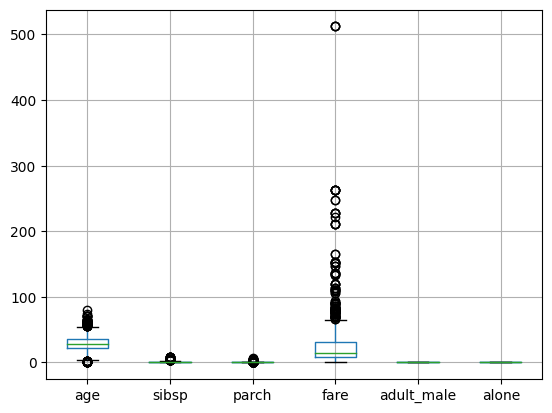

In [ ]:
titanic.boxplot()

### Deleting outliers

<Axes: >

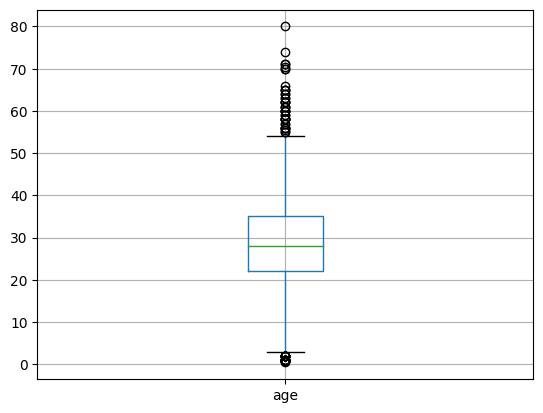

In [ ]:
titanic.boxplot(column='age')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Count unique ages, excluding NA values
titanic['age'].nunique(dropna=True)


88

In [ ]:
titanic = titanic[titanic['age'] > 2 ]

In [ ]:
titanic['age'].nunique(dropna=True)

81

- Deleted about 6% of outliers, the summary within age indicated that the lowest age on the titanic was about 5 months old and the oldest being 80 years old with the average being around 30 years old. In the boxplots the number of children were about 50, which could mean that children were prioritized for evacuation which could slightly influence survival rates.

<Axes: >

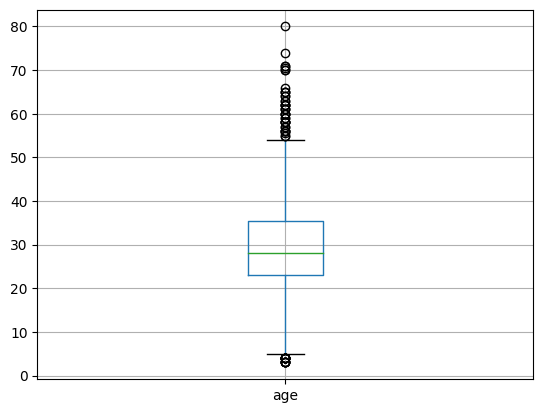

In [ ]:
titanic.boxplot(column='age')

<Axes: >

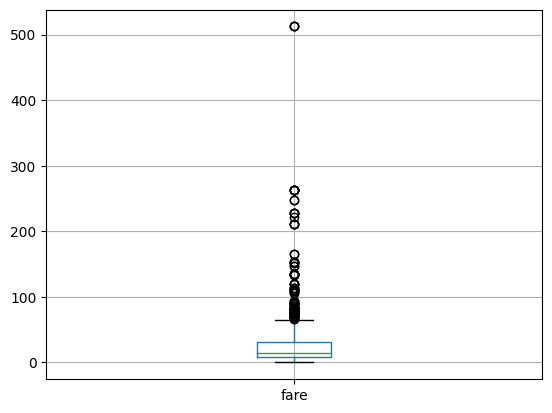

In [ ]:
titanic.boxplot(column='fare')

In [ ]:
titanic['fare'].nunique(dropna=True)

246

In [ ]:
titanic = titanic[titanic['fare'] < 145 ]

In [ ]:
titanic['fare'].nunique(dropna=True)

234

The fare prices in your dataset range from 0 to 512.33, with an average fare of 32.20. This average is misleading if a small number of passengers paid very high fares. By removing 5% of the outliers , this may indicate that the median fare (which is less affected by extreme values) provides a more realistic view of the fare distribution among the majority of passengers.

<Axes: >

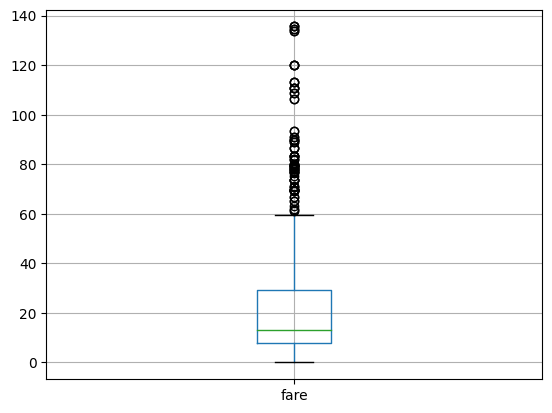

In [ ]:
titanic.boxplot(column='fare')

<Axes: >

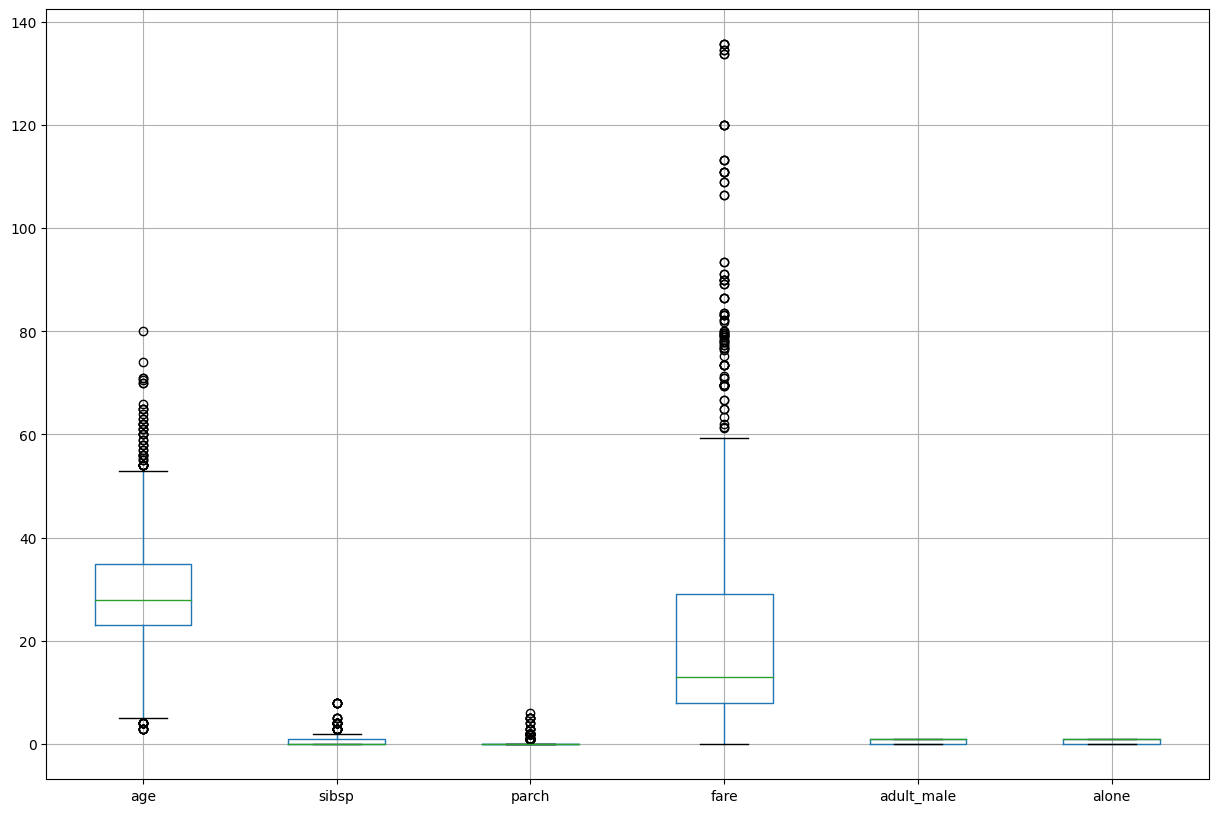

In [ ]:
titanic.boxplot(figsize=(15,10))

**Age:**
The age distribution has a wide range with many outliers, indicating a diverse age range among passengers, including a significant number of older passengers.

**Siblings/Spouses Aboard (sibsp):**
Box: The box is very short, indicating that the majority of passengers had few siblings or spouses on board. The median is close to zero.
Whiskers: The whiskers extend slightly above 2, showing that most passengers had between 0 and 2 siblings/spouses, with some outliers at higher values.
Outliers: There are a few outliers, but most passengers did not travel with many siblings or spouses.

**Parents/Children Aboard (parch):**
Box: Similar to the sibsp box, the parch box is also very short, indicating that most passengers had zero parents or children on board.
Whiskers: The whiskers extend to about 2, showing that very few passengers traveled with more than one or two parents/children.
Outliers: There are a few outliers, but the distribution is generally concentrated around zero.

**Fare:**
Box: The box is significantly taller than those for sibsp and parch, indicating a wide range of fares paid by passengers.
Whiskers: The whiskers extend to the lower and upper bounds of the fare distribution, showing that while most passengers paid less than $100, there were passengers who paid much more.
Outliers: The presence of many outliers above the upper whisker indicates that some passengers paid significantly higher fares, possibly reflecting different classes of service.

**Adult Male:**
Box: This feature likely represents a binary classification of adult males. The plot shows very little variability (all values appear to be around 1 for adult males and 0 for non-adult males).
Outliers: There are no outliers, as this is a binary variable.

**Alone:**
Box: This feature likely indicates whether a passenger traveled alone (1) or not (0). Similar to adult_male, there is very little variability.
Outliers: No outliers, as this is also a binary variable.

In [ ]:
feature_names = titanic.columns.tolist()
print(feature_names)

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male', 'alone']


## Count Plot: Survived, Pclass, Sex, Embarked, Class, Who, Adult_male and Alone

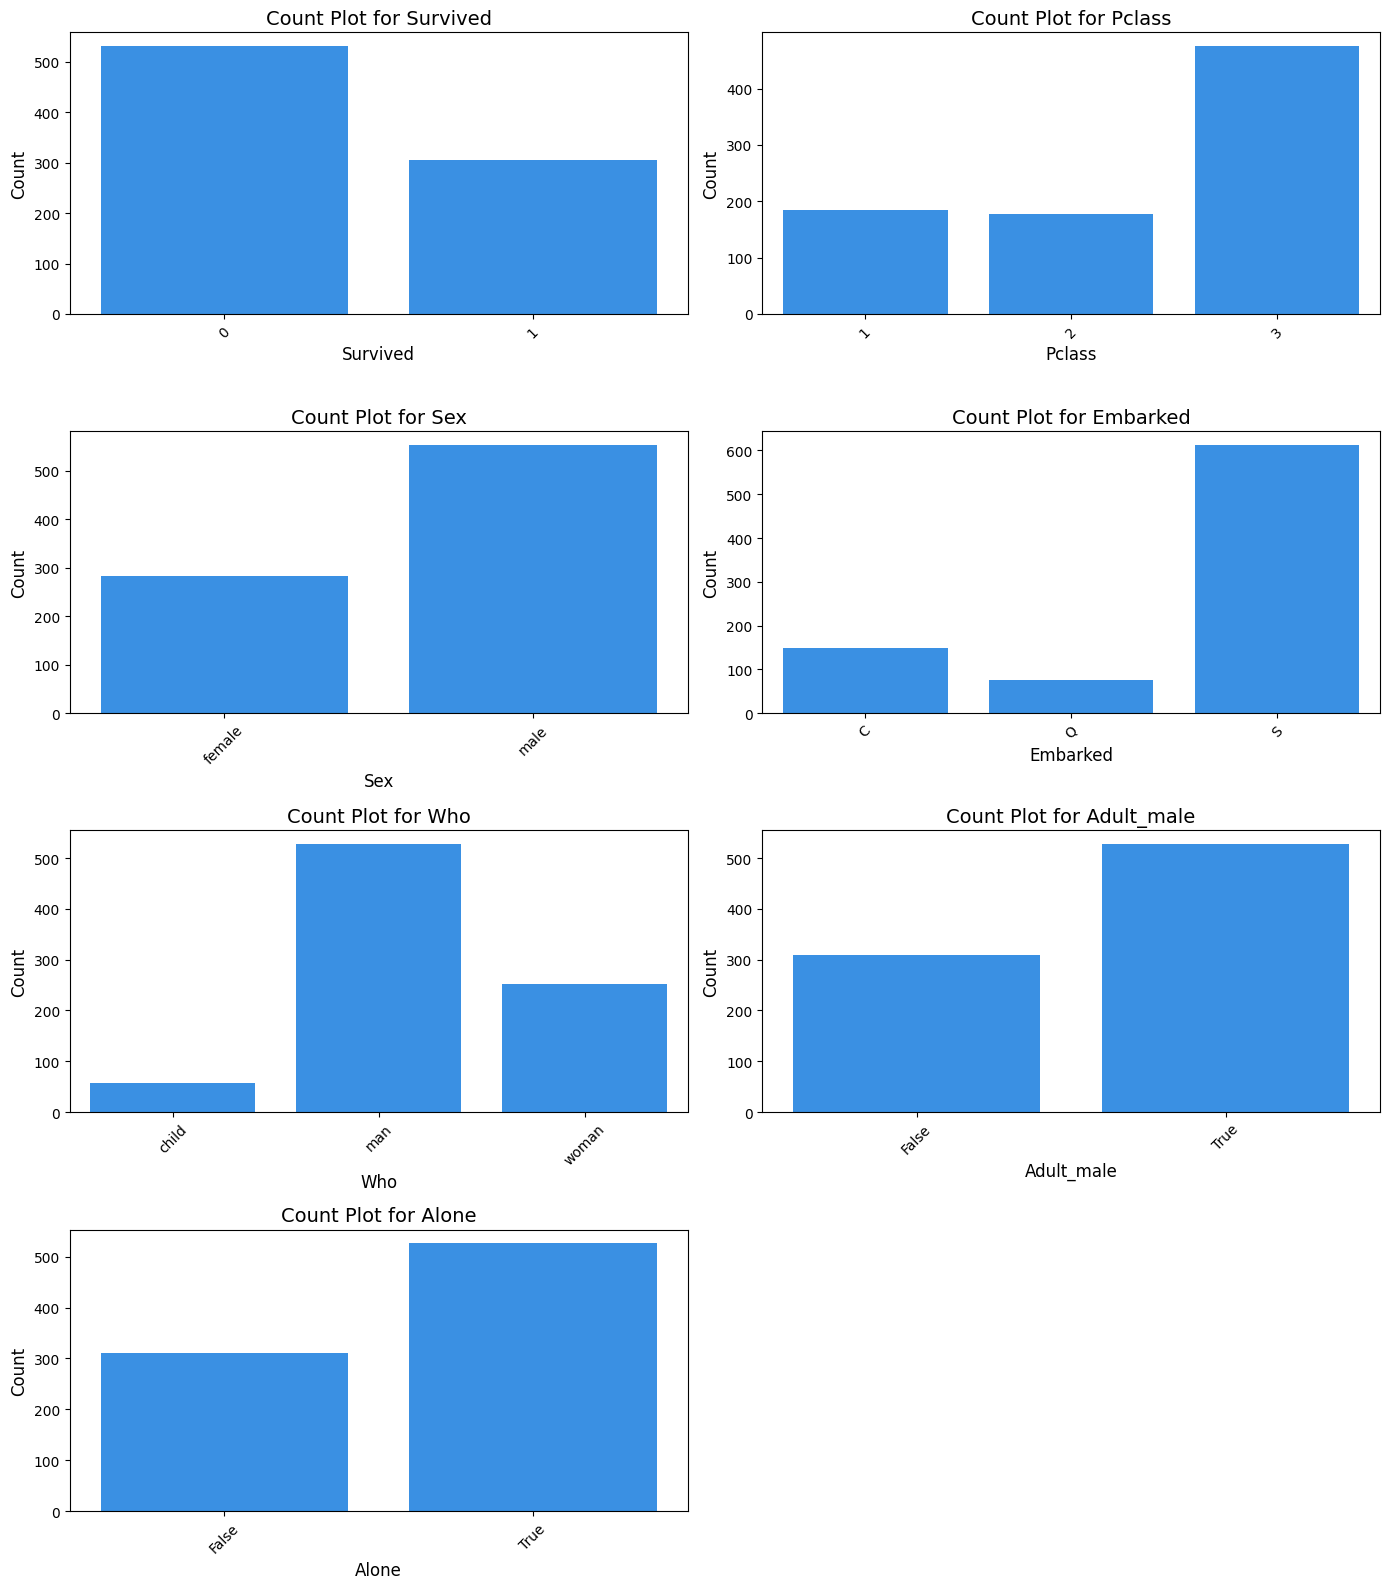

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['survived', 'pclass', 'sex', 'embarked', 'who', 'adult_male', 'alone']

# Number of columns for subplots (adjust to your preference)
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))  # Adjust height for readability
axes = axes.flatten()  # Flatten the axes array to easily iterate

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=titanic, x=column, color='dodgerblue', ax=axes[i])
    axes[i].set_title(f'Count Plot for {column.capitalize()}', fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots if the number of plots is odd
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**1. Count Plot for Survived**
Distribution: The plot shows that out of approximately 820 passengers, about 300 survived while 520 did not.

Implications: The significantly higher number of non-survivors indicates the catastrophic nature of the event. Understanding the survival rate can inform us about factors that may have contributed to survival, such as socioeconomic status, gender, or class.

**2. Count Plot for Pclass**
Distribution: This plot shows that the majority of passengers (about 500) were in 3rd class, followed by 190 in 1st class and 180 in 2nd class.

Implications: The distribution suggests that 3rd class had the highest representation among passengers. Historical context shows that 3rd-class passengers often had fewer resources and limited access to lifeboats, which could explain the high number of non-survivors. This raises questions about how class affected survival chances during the disaster.

**3. Count Plot for Sex**
Distribution: The data indicates a clear gender imbalance, with approximately 600 males and 280 females.

Implications: The larger number of male passengers may reflect social norms at the time, where men often traveled more for work. Survival rates tend to differ by gender, with women and children typically prioritized in lifeboat evacuations. This plot suggests a potential factor influencing survival rates, warranting further analysis of how gender impacted the outcomes.

**4. Count Plot for Embarked**
Distribution: Most passengers (around 600) embarked from Southampton, with 130 from Cherbourg and 50 from Queenstown.

Implications: This distribution can provide insights into the demographics of passengers and the geographical context of the voyage. The heavy concentration from Southampton might correlate with regional socio-economic factors, influencing the class distribution and potentially survival rates among passengers.

**5. Count Plot for Who**
Distribution: The categories reveal that the majority of passengers were men (about 520), followed by women (around 230) and children (about 50).

Implications: This demographic distribution highlights a skewed ratio of adults to children and women. The significantly higher number of men, combined with historical accounts of survival prioritization, suggests that many women and children may have had a better chance of survival, emphasizing gender roles during crises.

**6. Count Plot for Adult Male**
Distribution: This plot shows 500 adult males versus 300 non-adult males (individuals under 18).

Implications: The distribution reveals a predominance of adult males among passengers. Since adult males were often less prioritized in lifeboat evacuations during the disaster, this may explain their relatively lower survival rates. Understanding this distribution can guide further investigation into age and gender impacts on survival.

**7. Count Plot for Alone**
Distribution: The majority of passengers were not alone (about 520), with approximately 300 traveling alone.

Implications: This distribution suggests that many passengers were traveling in groups, which could influence their survival. Passengers traveling together may have had better chances of coordinating during the evacuation, indicating the importance of social connections in life-threatening situations.

The distributions presented in these plots illustrate the complex interplay of factors influencing survival in the Titanic disaster, including class, gender, age, and social dynamics. Understanding these distributions can lead to insights into societal norms of the early 20th century and how they shaped experiences during crises.

# Bivariate Analysis

## Correlation Matrix

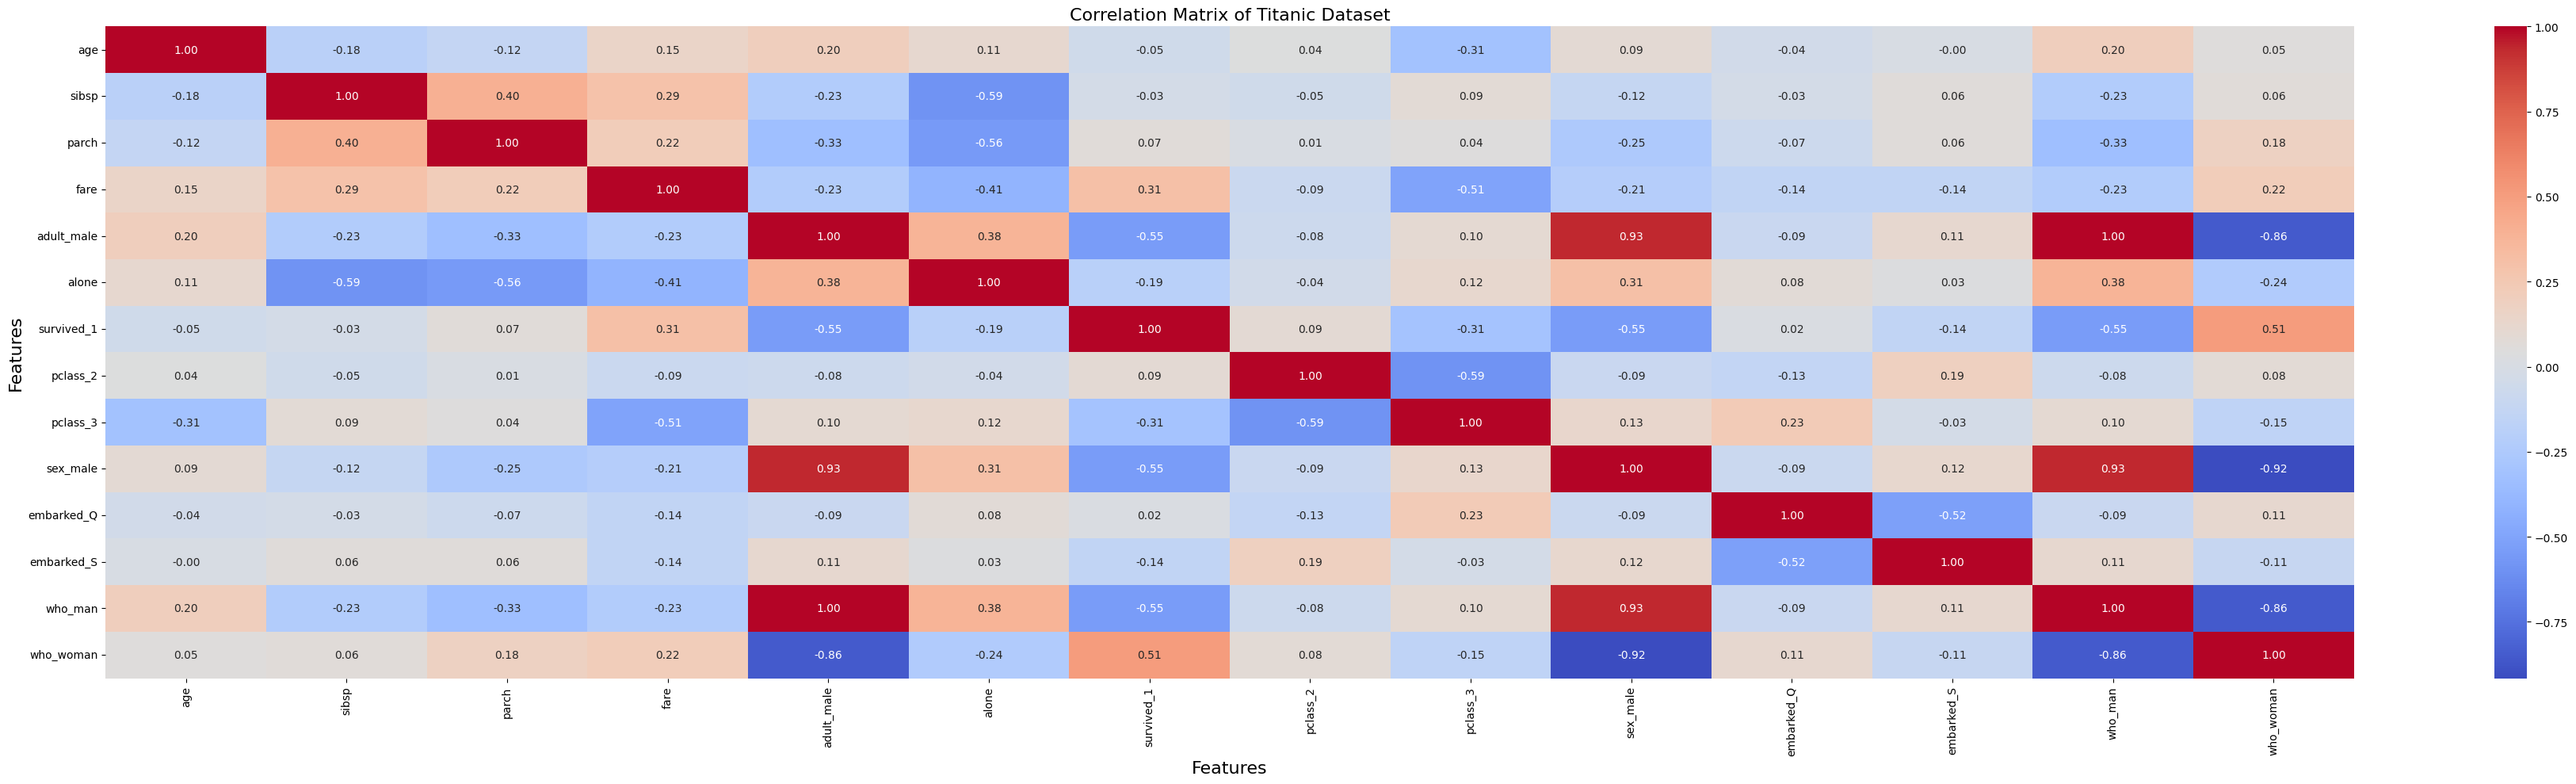

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify numeric, categorical, and boolean columns
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = titanic.select_dtypes(include=['object', 'category']).columns
boolean_columns = titanic.select_dtypes(include=['bool']).columns

# Step 2: One-hot encode the categorical columns
titanic_encoded = pd.get_dummies(titanic[categorical_columns], drop_first=True)

# Step 3: Combine numeric, boolean, and encoded categorical columns
titanic_final = pd.concat([titanic[numeric_columns], titanic[boolean_columns], titanic_encoded], axis=1)

# Step 4: Calculate the correlation matrix
correlation_matrix = titanic_final.corr()

# Step 5: Set up the matplotlib figure
plt.figure(figsize=(37, 10))

# Step 6: Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Step 7: Add titles and labels
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Highest Positive Correlation:** The highest positive correlation is between who_man and sex_male with a correlation coefficient of 0.93. This makes sense, as the features who_man and sex_male are highly related, where most males are identified as men. Although they may me highly correlated, the sex_male does not account for the children on the titanic that were male.

**Lowest Negative Correlation:** The lowest (most negative) correlation is between who_woman and sex_male with a correlation coefficient of -0.92. This strong negative correlation is expected since being labeled as a "woman" is mutually exclusive from being labeled as "male."


In [ ]:
titanic_final.head = titanic_final.drop(columns=['who_man'], axis= 1)

 I dropped who_man, because there was multicollinearity between who_man and adult_man.

#Logistic Regression

## Baseline Model

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter= 10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.14%


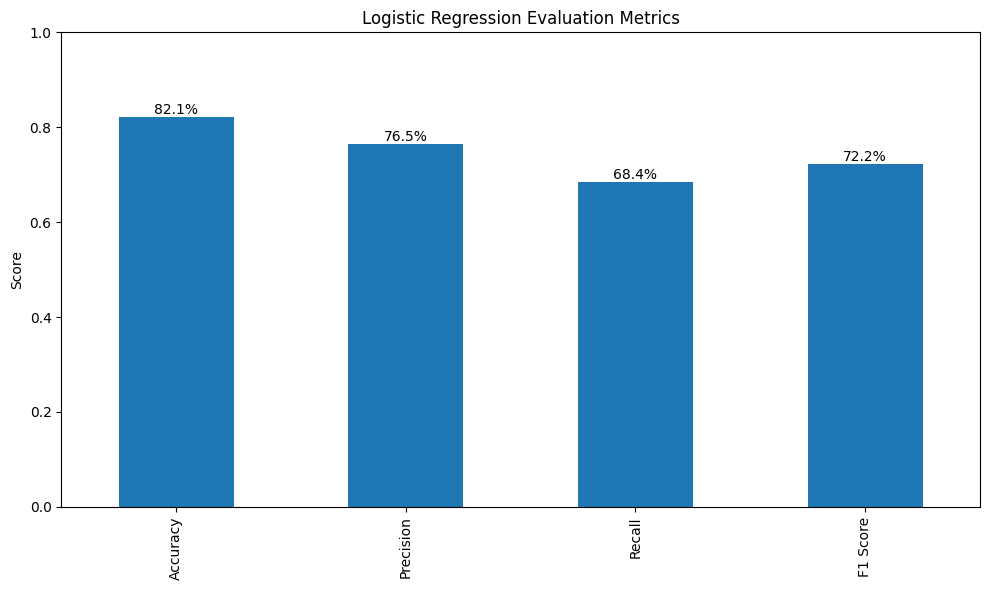

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are already defined (X = features, y = target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Collect metrics for Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

# Put metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary into a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression']).T  # Transpose to plot them properly

# Plot the metrics using a bar plot
ax =metrics_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Logistic Regression Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for a better scale

# Add percentage annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


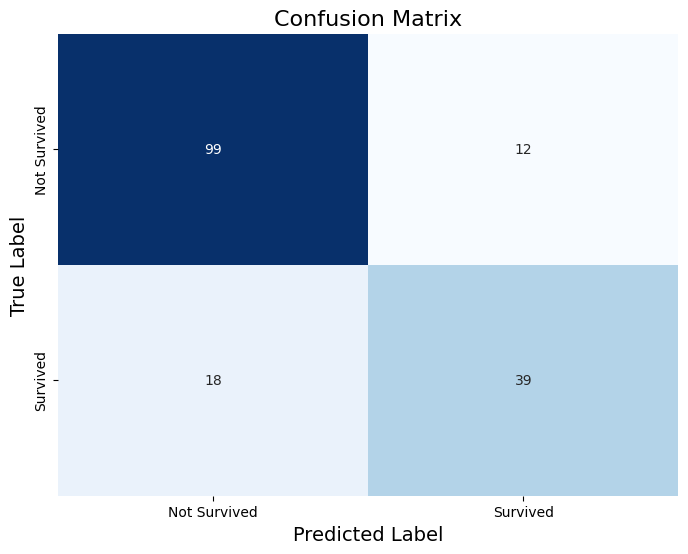

In [ ]:
# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

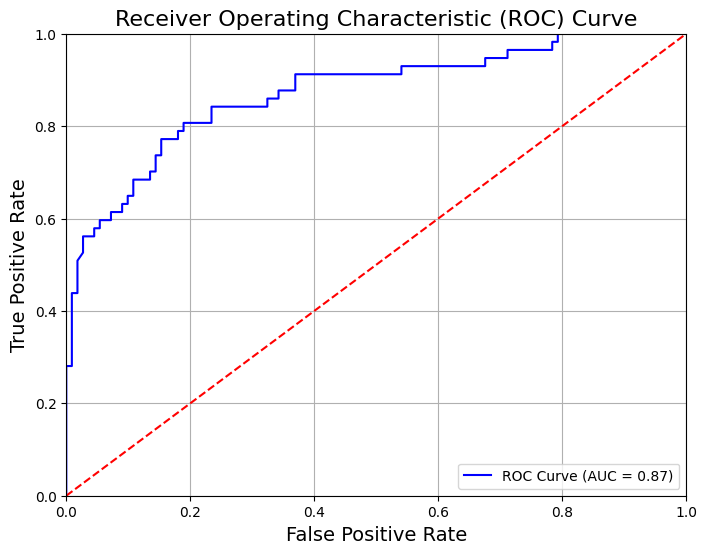

In [ ]:
# Step 6: Get the predicted probabilities for the ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 7: Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 8: Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)

# Step 9: Show the plot
plt.show()

## Analysis of Baseline Model

**Accuracy, Precision, Recall and F1 Score Graph:**
The Logistic Regression model is performing decently on the Titanic survival prediction task, with strong accuracy (82.1%) and reasonable precision (76.5%) and recall (68.4%).
This implies the model is good at identifying actual survivors but still misses around 31.6% of them (reflected in the recall). At the same time, about 23.5% of passengers predicted to survive didn’t actually survive (reflected in precision).

**Confusion Matrix:**
Accuracy: The overall number of correct predictions (99 true negatives + 39 true positives) is 138 out of a total of 168 predictions, contributing to the model’s accuracy of 82.1%.

False Positives and False Negatives:
There are 12 false positives, where the model incorrectly predicted that passengers survived.
There are 18 false negatives, where the model failed to predict that passengers survived.
Balance: The model performs better at identifying passengers who did not survive (99 true negatives vs. 18 false negatives), but struggles a bit more with predicting survivors (39 true positives vs. 12 false positives).


**ROC curve:**

AUC of 0.87: This suggests that the model has a strong ability to differentiate between passengers who survived and those who didn't. It means that, on average, the model ranks a randomly chosen survivor higher than a randomly chosen non-survivor 87% of the time.

Overall choosing a higher threshold in this case, will reduce the number of false positives, while still maintaining relatively moderate true positive to avoid misclassifications. The main goal in identifying more survivors than non-survivors.

## Model 1

Selected Features: Index(['fare', 'adult_male', 'sex_male', 'who_man', 'who_woman'], dtype='object')
Accuracy: 83.33%
Confusion Matrix:
[[99 12]
 [16 41]]


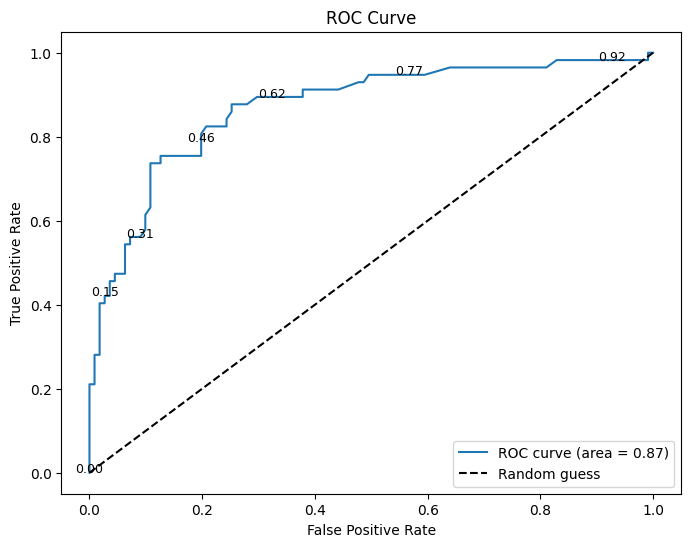

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Apply SelectKBest to select top 10 features (you can change k to the number of features you want)
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_features = X.columns[selector.get_support()]

# Print selected features
print(f"Selected Features: {selected_features}")

# Split the data into training and testing sets with the selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
# Add threshold values at key points
for i, thresh in enumerate(np.linspace(0, 1, num=len(fpr))):
    if i % 10 == 0:  # Annotate every 10th threshold to avoid clutter
        plt.text(fpr[i], tpr[i], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Key Threshold Points:

- At threshold 0.00: The model predicts everything as positive (FPR and TPR are both 1). This results in no discrimination between positive and negative cases.

- At threshold 0.15: The model starts separating positives and negatives better. Here, the FPR is around 0.2, meaning that 20% of the negative cases are incorrectly classified as positive, but the TPR is around 0.8, capturing 80% of true positives.

- At threshold 0.46: The model is a bit more balanced between FPR and TPR. The FPR is reduced to about 0.2, while the TPR is about 0.85. This is a reasonable point, as the trade-off between TPR and FPR is more balanced.

- At threshold 0.92: The model is very conservative, predicting mostly negative outcomes. This results in a low FPR (close to 0) but also a reduced TPR (around 0.9). This may not be ideal, as the model could be missing a lot of true positives.


At threshold 0.46: The True Positive Rate (TPR) is high (around 85%), and the False Positive Rate (FPR) is relatively low (~0.2).
At threshold 0.62: The TPR remains high, and the FPR slightly decreases. This may represent a sweet spot depending on the context of the problem.
Conclusion:
A threshold of 0.46 or 0.62 could be a good choice since they balance high TPR and low FPR, making the model more reliable in identifying positive cases while minimizing false positives.
This would be a reasonable compromise, especially in a life-or-death scenario like the Titanic, where you want to maximize survival predictions while keeping false positives manageable.






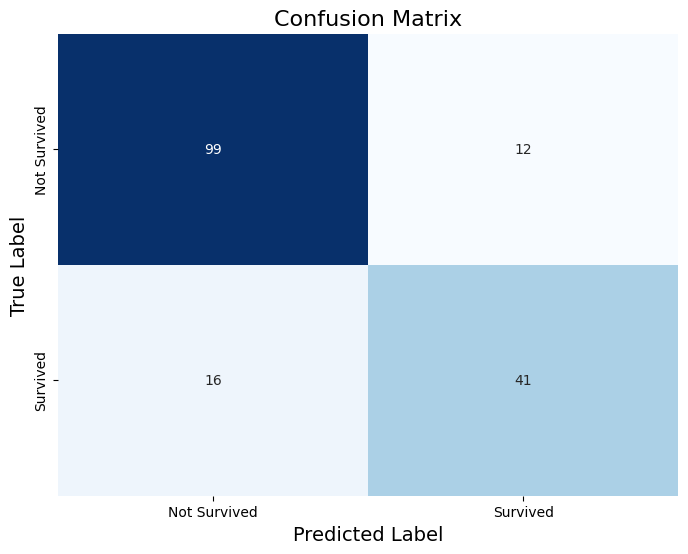

In [ ]:
# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

- True Positive (TP): 99 passengers were correctly predicted to survive.
- False Positive (FP): 12 passengers were incorrectly predicted to survive (they actually didn't).
- True Negative (TN): 16 passengers truly survived, but were preficted as not survived.
- False Negative (FN): 41 passengers were truly survived and predicted as survived.


1. KBest = 5
KBest selects the top features from your dataset that have the strongest relationship with the target variable, which in this case is survival.
By setting K = 5, you’ve chosen to use the top 5 most important features that have the strongest correlation with survival, based on the chi-squared test. These features might include variables like '**fare', 'adult_male', 'sex_male', 'who_man', 'who_woman' onboard.**
2. Accuracy of 83.3%
An accuracy of 83.3% means that the model is correctly predicting survival or non-survival for 83.3% of the passengers in your testing set. In practical terms
The remaining 16.7% of predictions are incorrect (either survivors being classified as non-survivors or vice versa).

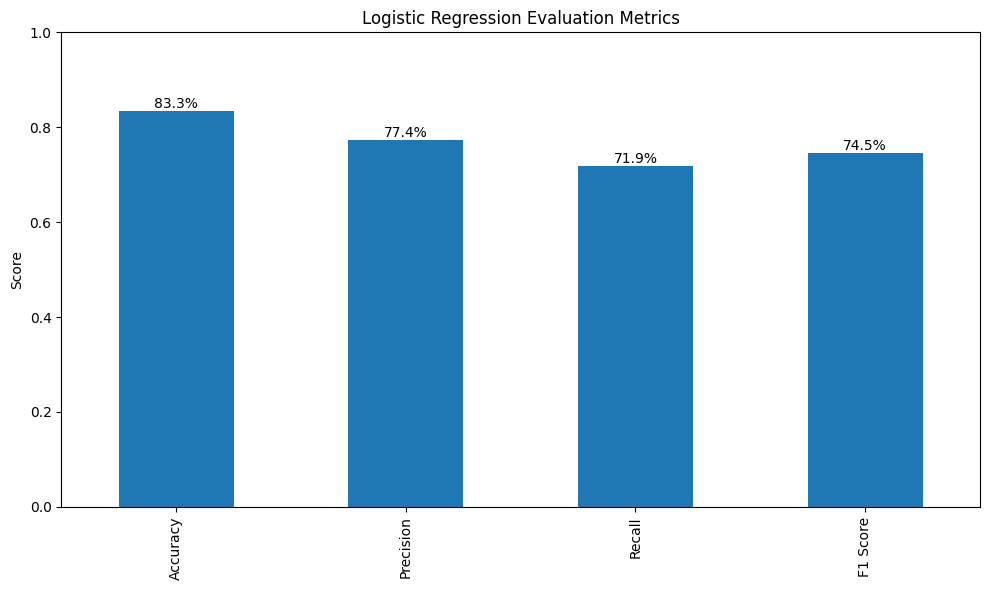

In [ ]:
# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Put metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary into a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression']).T  # Transpose to plot them properly

# Plot the metrics using a bar plot
ax = metrics_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Logistic Regression Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for a better scale

# Add percentage annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Precison of 77.4% means when the model predicts, it is correct 77.4% of the time, which does not account for actual survivors, especially considering 22.6% of the predictions are false positives, which indicates that there are passengers who were incorrectly predicted to survive but did not.

- A recall of 71.9% indicates that the model successfully identifies 71.9% of the actual survivors among the Titanic passengers. This means that nearly 28.1% of the actual survivors were missed by the model, classified as non-survivors (false negatives). This could represent a significant number of people, as it means many survivors are not being recognized.

- An F1 score of 74.5% indicates a moderate overall performance of the model in identifying survivors, it also suggests that there are significant improvements needed in both precision and recall. The presence of false positives and false negatives means that refining the model could yield better results.

# Decision Trees

## Baseline Model

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'titanic_final' is already prepared as before

# Step 1: Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree classifier model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = dt.predict(X_test)

# Step 5: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 76.19%


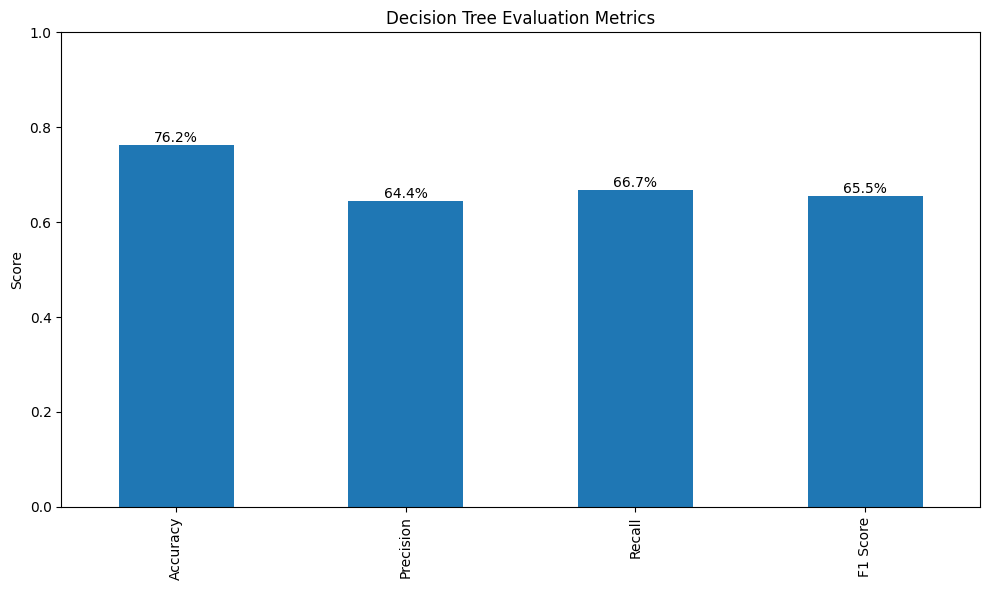

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are already defined (X = features, y = target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Collect metrics for Decision Tree model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Put metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary into a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=['Decision Tree']).T  # Transpose to plot them properly

# Plot the metrics using a bar plot
ax =metrics_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Decision Tree Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for a better scale

# Add percentage annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()




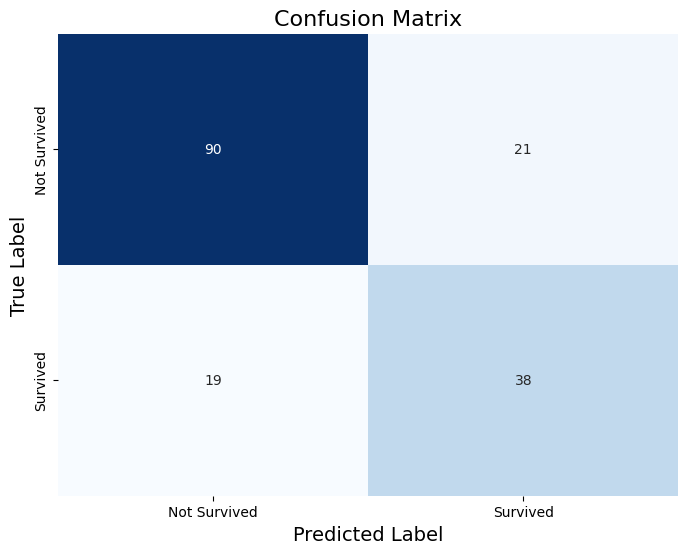

In [ ]:
# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

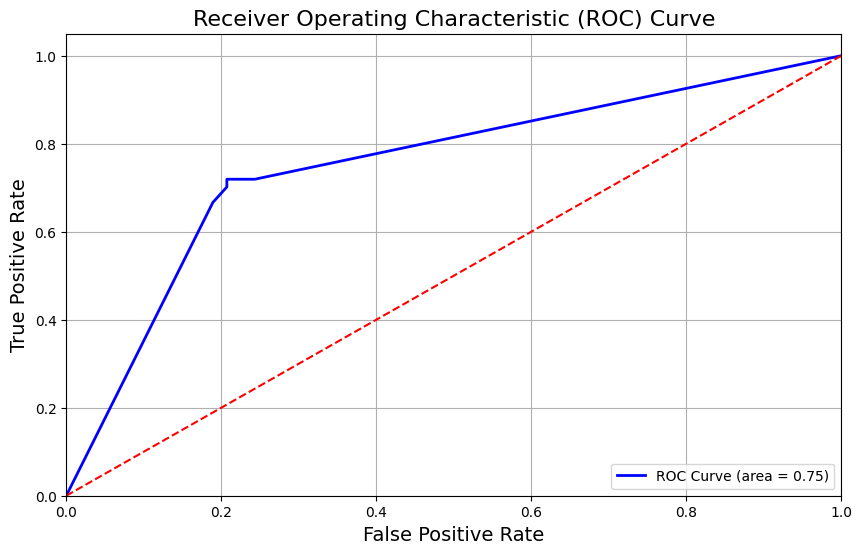

In [ ]:
# Step 6: Get the predicted probabilities for the positive class
y_probs = dt.predict_proba(X_test)[:, 1]

# Step 7: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 8: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Analysis of Baseline Model

**Accuracy, Precision, Recall and F1 score:**

- A relatively high accuracy of 76.13%, does not account for 23.87%
- A precision of 64.4% indicates that when the model predicts a passenger survived, it is correct 64.4% of the time. This relatively lower precision suggests that the model may be incorrectly classifying a notable number of non-survivors as survivors
- A recall of 66.7% means the model correctly identifies 66.7% of the passengers who did survive. This metric indicates that there are still many survivors being missed by the model (i.e., false negatives), as 33.3% of actual survivors are not being detected.


**Confusion Matrix:**
TP -90
FP - 21
FN - 19
TN - 39
- The presence of 19 false negatives suggests that there are survivors being overlooked by the model. This can be problematic in real-world applications where identifying survivors is critical.
- The model incorrectly predicted that 21 passengers survived when they actually did not. This can be concerning in practical applications, as these false positives could lead to misplaced resources or support meant for actual survivors.

**ROC curve:**
- At 0.2 false positive, the true positive rate is 70%
- At 0.30 false positive, the true positive rate is 77%
- At 0.40 false positive, the true positive rates is 79%

As the false positive rate increases, the true positive rate increases, but that means that more people are being predicted as survived but they did not survive. Resources that could be used for people that need attention is being depleted and there is delayed response to rescue attempts. Therefore a lower threshold is better. From looking at the curve, the best optimal point is at false positive at 0.18% and true positive of about 65%.



## Model 2

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'titanic_final' is already prepared as before

# Step 1: Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree classifier model with 'max_features'
dt = DecisionTreeClassifier(random_state=42, max_features= 8)  # You can try other values like 'log2', or set it to an integer
dt.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = dt.predict(X_test)

# Step 5: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.14%


- Decision Trees tend to overfit the training data, especially when they are allowed to grow very deep. By limiting the number of features considered at each split (i.e., setting max_features=8)
-  It allows the model to create a balance of complexity and accuracy, ultimately leading to more reliable predictions.

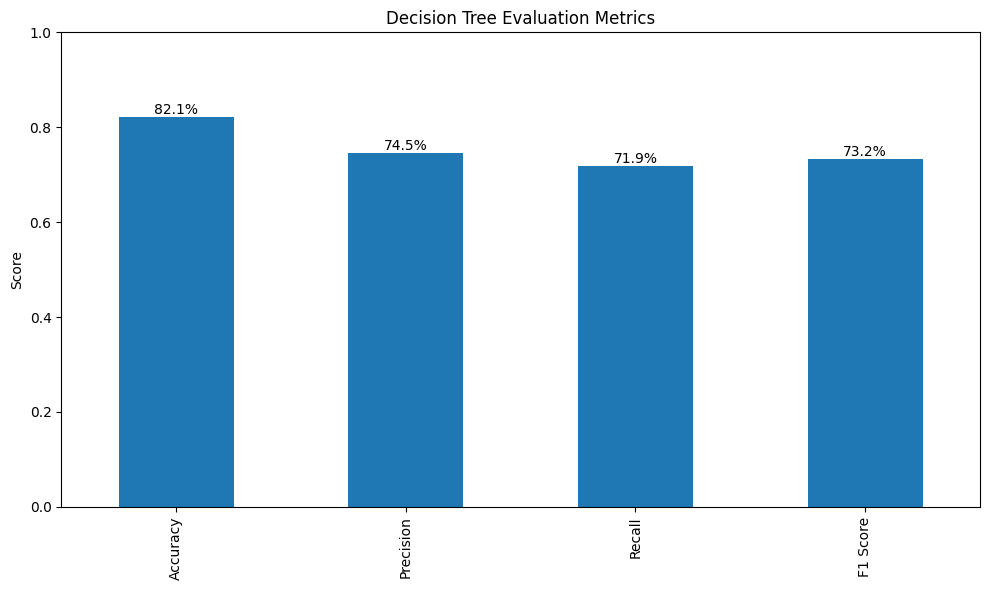

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are already defined (X = features, y = target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_features =8)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Collect metrics for Decision Tree model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Put metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary into a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=['Decision Tree']).T  # Transpose to plot them properly

# Plot the metrics using a bar plot
ax =metrics_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Decision Tree Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for a better scale

# Add percentage annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()




- This means that 82.1% of the predictions made by the model are correct.
- The precision is reasonably high (74.5%), suggesting that when it predicts a passenger will survive, it is often correct.
- The recall is somewhat lower (71.9%), meaning that there are many survivors that the model fails to recognize. This could be a significant issue, especially in a scenario where missing a survivor can have serious implications.
- The F1 score, while decent (73.2%), suggests that there is still room for improvement in achieving a better balance between precision and recall.

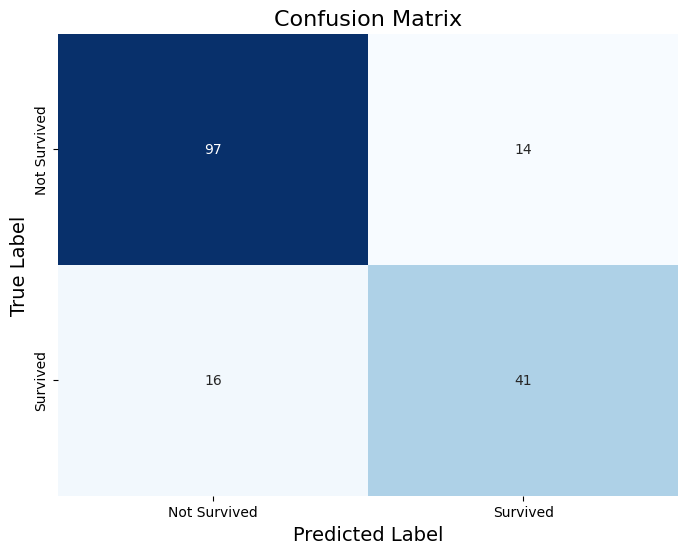

In [ ]:
# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

- TP - 97
- FP - 14
- TN - 16
- FN - 41

FP: These 14 passengers did not survive, but the model incorrectly predicted they would survive.
Implications:
In the context of a disaster like the Titanic, predicting someone as surviving when they actually didn’t can lead to misallocating resources (like medical supplies or rescue efforts) under the assumption that this person is safe.
This is a critical mistake because resources might not be directed toward people who really need them (those who didn't survive are mistakenly assumed to be fine).

FN: These 41 passengers actually survived, but the model incorrectly predicted they would not survive.
Implications:
This type of mistake is serious but different in its consequences. These survivors might not get the immediate help or resources they need because the model assumes they did not survive. It could delay them receiving help, medical attention, or contacting loved ones.
However, since they did survive, they still have a chance to get help once the mistake is realized, though it might be delayed.

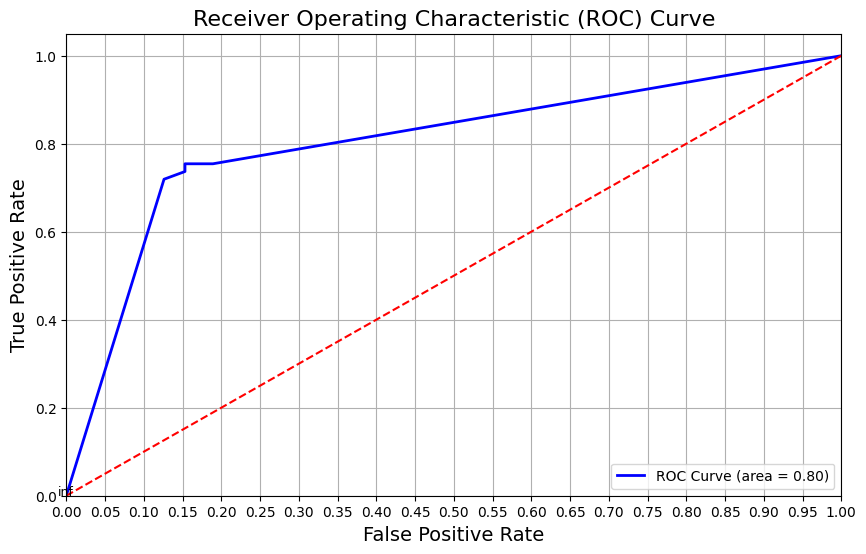

In [ ]:
# Step 6: Get the predicted probabilities for the positive class
y_probs = dt.predict_proba(X_test)[:, 1]

# Step 7: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 8: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing

# Add threshold values at specific points on the curve
for i, thresh in enumerate(np.linspace(0, 1, num=len(fpr))):
    if i % 10 == 0:  # Annotate every 10th threshold to avoid clutter
        plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='black', ha='center')

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

- 0.10 FPR, 60% TPR: At this point, the model correctly identifies 60% of survivors while only misclassifying 10% of non-survivors as survivors.
- 0.15 FPR, 77% TPR: At a slightly higher FPR, the model improves in identifying survivors (TPR), correctly predicting 77%.
- 0.30 FPR, 80% TPR: At this point, the FPR increases to 30%, but the improvement in TPR is marginal (from 77% to 80%).
- 0.60 FPR, 84% TPR: A significant increase in FPR (60%), with only a small gain in TPR (from 80% to 84%).
- 0.80 FPR, 93% TPR: At this point, the model is correctly identifying 93% of survivors but at the cost of a high FPR of 80%, meaning a large number of non-survivors are being incorrectly classified as survivors.

Around a 0.2 TPR, the ROC curve drastically moves away from the y-axis, suggesting the model becomes less effective at minimizing false positives as it tries to capture more true positives. This could indicate that, beyond this point, increasing the TPR comes at the expense of a steep rise in FPR.

Best Threshold:
Balance Between TPR and FPR: The threshold that offers the best balance between true positives (survivors correctly identified) and false positives (non-survivors incorrectly identified) is typically where the ROC curve has a steep rise but without a significant increase in FPR.

The best threshold from the options provided would likely be around 0.15 FPR with a 77% TPR. This point provides a solid trade-off, achieving a high true positive rate without incurring too many false positives. Beyond this point, the gain in TPR becomes marginal compared to the steep rise in FPR, making it less efficient in terms of minimizing false classifications.

This threshold offers a good balance between correctly identifying survivors and minimizing incorrect classifications of non-survivors, making it the most effective for the Titanic survival context.

# Naives Bayes

## Model 3

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'titanic_final' is already prepared as before

# Step 1: Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Naive Bayes classifier model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Step 5: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 83.33%


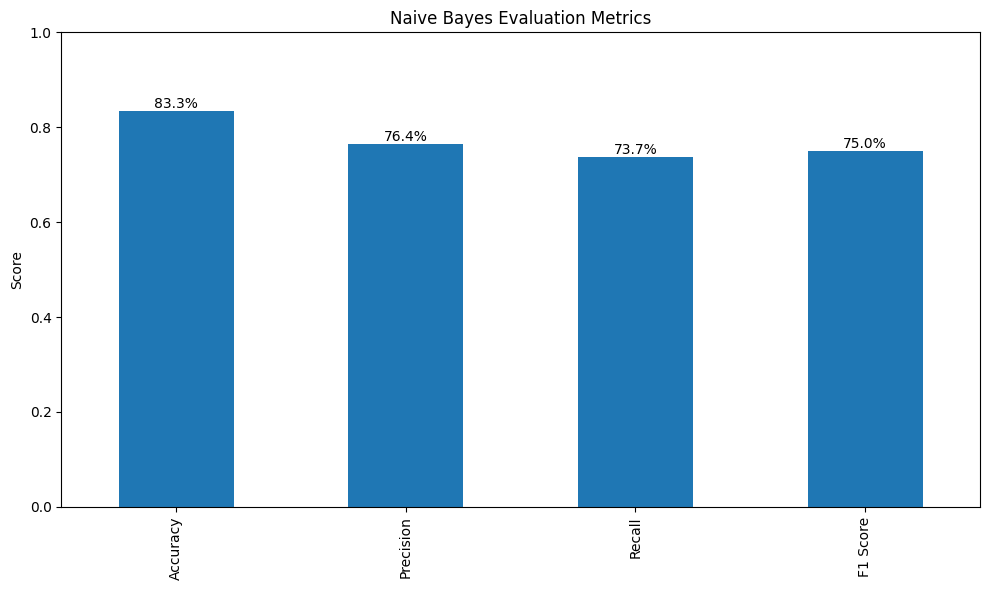

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are already defined (X = features, y = target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Collect metrics for Naive Bayes model
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Put metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary into a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=['Naive Bayes']).T  # Transpose to plot them properly

# Plot the metrics using a bar plot
ax =metrics_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Naive Bayes Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for a better scale

# Add percentage annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


- Out of all the passengers in the test set, the model correctly predicted the survival status for 83.3% of them. This is a relatively good overall performance.
- When the model predicted that a passenger would survive, it was correct 76.4% of the time. This shows that about 1 in 4 passengers predicted to survive did not actually survive (false positives)
- The model was able to correctly identify 73.7% of the actual survivors. This means that around 26.3% of the people who actually survived were missed by the model (false negatives).
- The F1 score shows the model’s ability to find a balance between over-predicting survivors and missing actual survivors. It suggests the model performs well overall, but there are still false positives and false negatives to address.

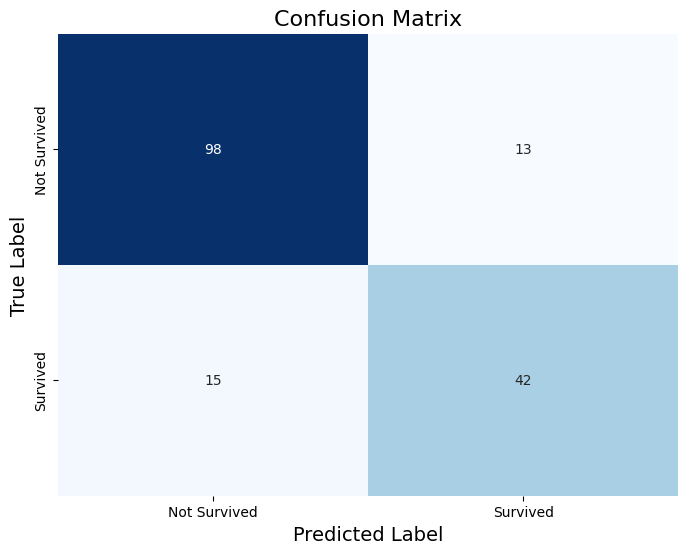

In [ ]:
# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

- TP -98
- FP - 13
- TN - 15
- FN-  42

**FP:**  
The model incorrectly predicted that 13 passengers would survive, but in reality, they did not survive.
Implications:
In a rescue or resource allocation scenario, this type of error could lead to misallocated resources. These 13 people are thought to be safe and might not be prioritized for rescue or aid, when in fact, they did not survive.
This type of error can be dangerous because it gives a false sense of security—thinking someone is safe when they aren’t. It may result in delayed or missed opportunities to provide resources or assistance.

**FN:**

These 42 individuals actually survived, but the system classified them as non-survivors. While they are alive, this misclassification could result in delayed rescue or support because the model suggests they did not make it.
Though not as immediately harmful as false positives, these errors could cause delays in offering aid or contacting the families of these survivors, which can lead to complications in their recovery or well-being.


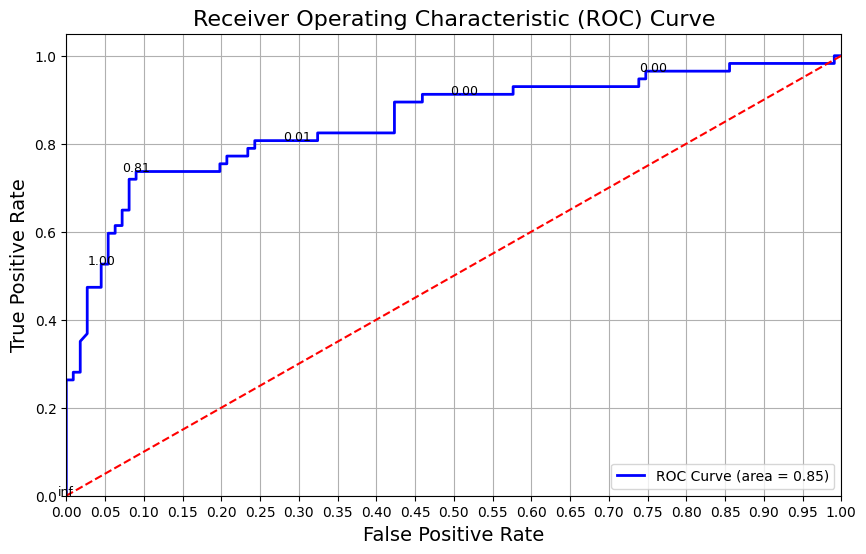

In [ ]:
# Step 6: Get the predicted probabilities for the positive class
y_probs = classifier.predict_proba(X_test)[:, 1]

# Step 7: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 8: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing

# Add threshold values at specific points on the curve
for i, thresh in enumerate(np.linspace(0, 1, num=len(fpr))):
    if i % 10 == 0:  # Annotate every 10th threshold to avoid clutter
        plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='black', ha='center')

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()
plt.show()

85% chance that the model will correctly distinguish between survivors and non-survivors based on its predictions. In other words, the model has a good ability to separate the positive class (survivors) from the negative class (non-survivors), but it is not perfect.

- At threshold 1.00, the true positive rate is 51%, false positive is 5%
- At threshold 0.81, the true positive rate is 73%, false postive at 10%
- At threshold 0.01, the true positive rate is 81%, false postive at 30%
- At threshold 0.00, the true positive is at 90%, false positive at 0.50%
- At thresholf 0.00 (Case 2), true positive 98%, false positive at 0.75%

A balanced threshold like 0.81 tends to strike a good balance between the True Positive Rate and False Positive Rate.
For example, if the TPR is around 73% and the FPR is only 10%, this threshold may be optimal because it identifies a good portion of the survivors while keeping the false positives low.
This threshold minimizes overall misclassifications by having a balance between correctly identifying survivors and not incorrectly classifying non-survivors as survivors.






- The baseline Naives Bayes model performed better therefore did not decided to improve it.

# ROC: Logistic, Decision Trees, Naives Bayes ( with Improved Models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal Threshold for Logistic Regression: 0.36
Optimal Threshold for Naive Bayes: 0.46
Optimal Threshold for Decision Tree: 0.84


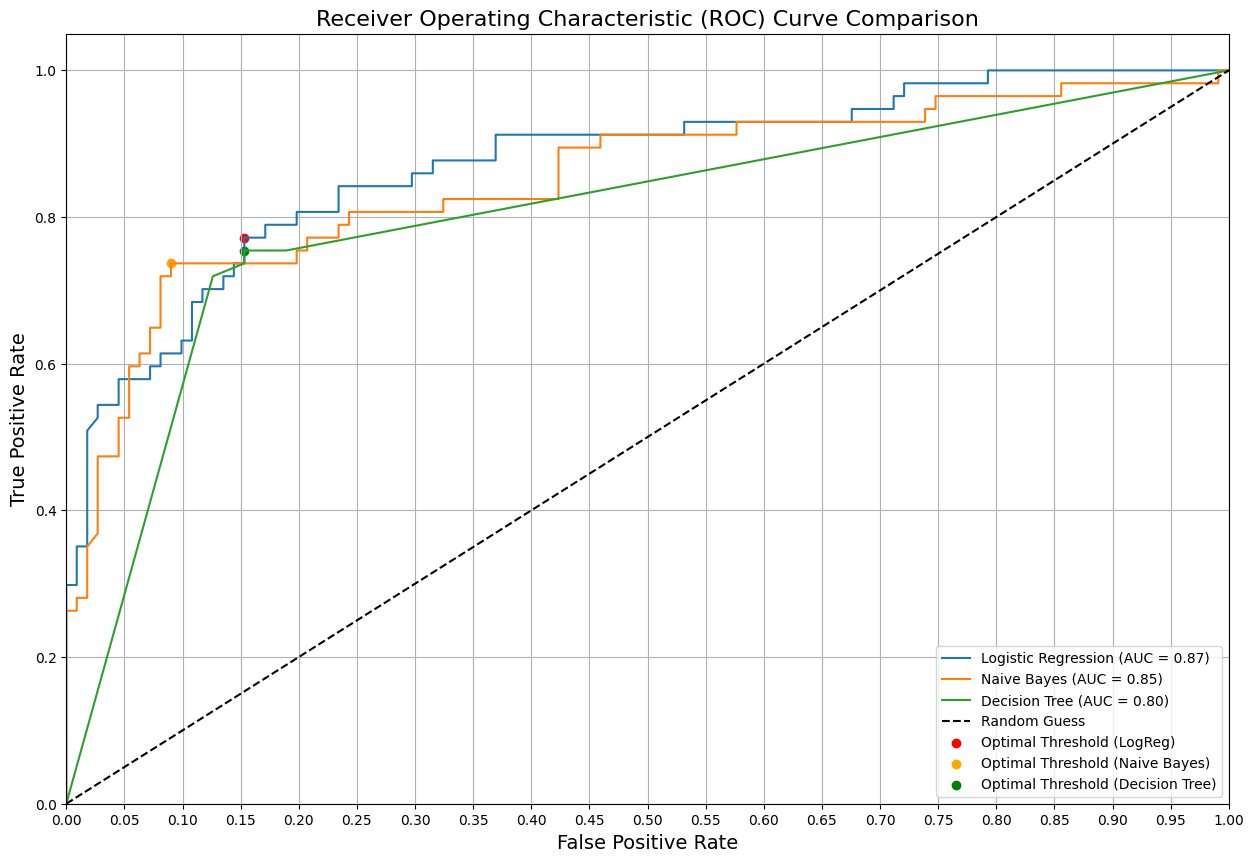

Logistic Regression AUC: 0.873
Naive Bayes AUC: 0.851
Decision Tree AUC: 0.803


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

# Assuming 'titanic_final' is already prepared as before

# Step 1: Split the data into features (X) and target variable (y)
X = titanic_final.drop('survived_1', axis=1)
y = titanic_final['survived_1']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the models
# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_features=8)
dt_model.fit(X_train, y_train)

# Step 4: Get predicted probabilities for the positive class
y_probs_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Step 5: Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_probs_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Step 6: Calculate the optimal threshold
def find_best_threshold(fpr, tpr):
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds_logreg[optimal_idx]
    return optimal_threshold

optimal_threshold_logreg = find_best_threshold(fpr_logreg, tpr_logreg)
optimal_threshold_nb = find_best_threshold(fpr_nb, tpr_nb)
optimal_threshold_dt = find_best_threshold(fpr_dt, tpr_dt)

print(f"Optimal Threshold for Logistic Regression: {optimal_threshold_logreg:.2f}")
print(f"Optimal Threshold for Naive Bayes: {optimal_threshold_nb:.2f}")
print(f"Optimal Threshold for Decision Tree: {optimal_threshold_dt:.2f}")

# Step 7: Plotting the ROC curves
plt.figure(figsize=(15, 10))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot optimal thresholds
plt.scatter(fpr_logreg[np.argmax(tpr_logreg - fpr_logreg)], tpr_logreg[np.argmax(tpr_logreg - fpr_logreg)],
            marker='o', color='red', label='Optimal Threshold (LogReg)')
plt.scatter(fpr_nb[np.argmax(tpr_nb - fpr_nb)], tpr_nb[np.argmax(tpr_nb - fpr_nb)],
            marker='o', color='orange', label='Optimal Threshold (Naive Bayes)')
plt.scatter(fpr_dt[np.argmax(tpr_dt - fpr_dt)], tpr_dt[np.argmax(tpr_dt - fpr_dt)],
            marker='o', color='green', label='Optimal Threshold (Decision Tree)')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the AUC scores for each model
print(f"Logistic Regression AUC: {roc_auc_logreg:.3f}")
print(f"Naive Bayes AUC: {roc_auc_nb:.3f}")
print(f"Decision Tree AUC: {roc_auc_dt:.3f}")


- At 15%, the best model is the Logistic Regression (Model 1) and Naives Bayes(Model 3)
- At 30%, the best model is the Logistic Regression
- At 50%, the best model is Logistic Regression  and Nayes Bayes
- At 70%, the best model is the Logistic Regression
- At 90%, the best model is the logistic Regression

Logistic Regression (Model 1) and Naive Bayes(Model 3) models perform best across several thresholds. Specifically, at 15%, 30%, 50%, 70%, and 90% decision thresholds, Logistic Regression consistently shows strong predictive power, and Naive Bayes performs well at 15% and 50%.

Decision Tree Model(Model 2): The curve for the decision tree being away from the y-axis indicates that the model predicts more false positives, reducing its overall performance. Since its ROC curve does not start near 0 on the x-axis (the FPR axis), this suggests that the model fails to capture true negatives efficiently, resulting in poor distinction between classes at many thresholds.

On the ROC curve the 3 dots indicate the most optimal for each of the 3 models:
- At a true positive of 73%, and false positive of 8% shows that is optimal threshold for the Naive Bayes model
- At a true postive of 75% and a false positive at 15% shows that is optimal threshold for the Decision Tree model
- At true positive of 77% and false positive of 15% shows that is optimal threshold for Logistic Model

In summary, Logistic Regression (Model 1) tends to outperform at various thresholds, and the ROC curves for Logistic Regression and Naive Bayes reflect better performance than Decision Trees in terms of balancing true and false positives, but they still start capturing true positives at a rate of around 23-25% rather than right from the start.

# Final Intrepretation

Naive Bayes shows decent performance at lower thresholds (15% and 50%) but struggles to maintain the same level of accuracy at higher thresholds, as indicated by its ROC curve. It has a good balance of true positives at 73%, with a low false positive rate (8%) at its optimal threshold, but Logistic Regression outshines it at more points.

The Decision Tree model, on the other hand, performs worse overall. Its ROC curve indicates that it has higher false positives, reducing its ability to make accurate predictions. With a false positive rate of 15%, the Decision Tree model struggles to differentiate between survivors and non-survivors, leading to less accurate predictions.

In conclusion, Logistic Regression stands out due to its ability to consistently balance false positives and false negatives across various decision thresholds. While it misclassifies some survivors (16 false negatives) and non-survivors (12 false positives), it remains the most robust model in capturing survival patterns in the Titanic dataset. Its performance is superior to Naive Bayes and Decision Trees due to its stability, better generalization of patterns, and avoidance of overfitting.